In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mckorob","key":"9dae6fda7d9df67998e29b8f3cbbaf35"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d chebotinaa/fast-food-marketing-campaign-ab-test

Dataset URL: https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test
License(s): other
  0% 0.00/3.31k [00:00<?, ?B/s]
100% 3.31k/3.31k [00:00<00:00, 10.7MB/s]


In [8]:
!unzip fast-food-marketing-campaign-ab-test.zip

Archive:  fast-food-marketing-campaign-ab-test.zip
  inflating: WA_Marketing-Campaign.csv  


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
df = pd.read_csv('WA_Marketing-Campaign.csv')
display(df.describe(include='all'))
display(df['MarketSize'].unique())

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548.000000,548.000000,548.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,3.000000,3.250000,60.477500


array(['Medium', 'Small', 'Large'], dtype=object)

/tmp/ipython-input-1082686778.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promotion', y='SalesInThousands', data=df, ci=None)


<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

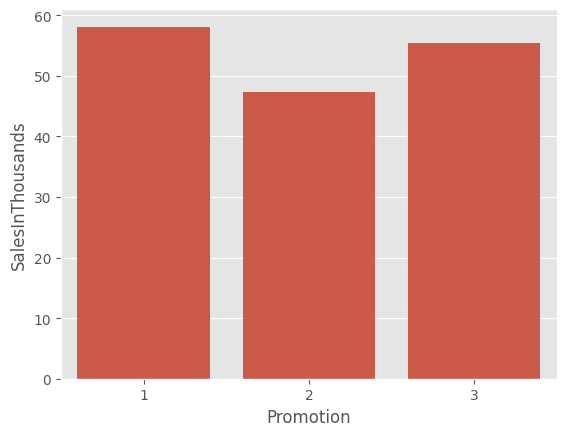

In [14]:
a = df.groupby(['Promotion']).agg(
    sales = ('SalesInThousands', 'mean')
)
sns.barplot(x='Promotion', y='SalesInThousands', data=df, ci=None)

In [20]:
from scipy.stats import f_oneway, ttest_ind

def test_for_size(sizes):
  a = df[df['MarketSize'].isin(sizes)]
  t_stat, p_value = ttest_ind(
      a[a['Promotion'] == 1]['SalesInThousands'],
      a[a['Promotion'] == 3]['SalesInThousands'],
  )
  return [t_stat, p_value]
t_stat, p_value = test_for_size(['Small', 'Large', 'Medium'])
display(t_stat, p_value)
# Выводы: очиевидно вторая стратегия провальная, однако статистических разичий между первой и третьей нету (p_value = 0.12 - такой эффект будет виден при нулевой гитезе (среднее 1 = среднее 3) в 12% случаях)

np.float64(1.5551383687293547)

np.float64(0.12079667272313273)

<Axes: ylabel='count'>

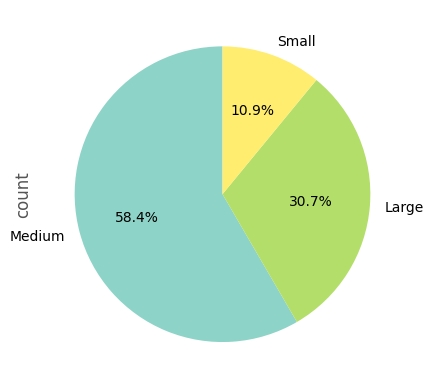

In [21]:
df['MarketSize'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')

<Axes: ylabel='count'>

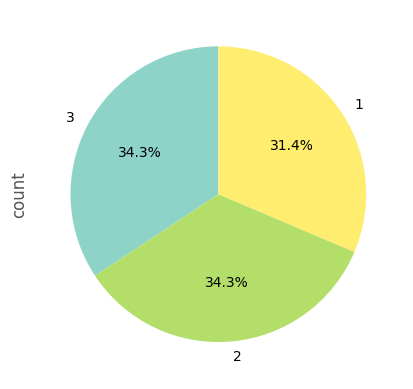

In [22]:
df['Promotion'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')

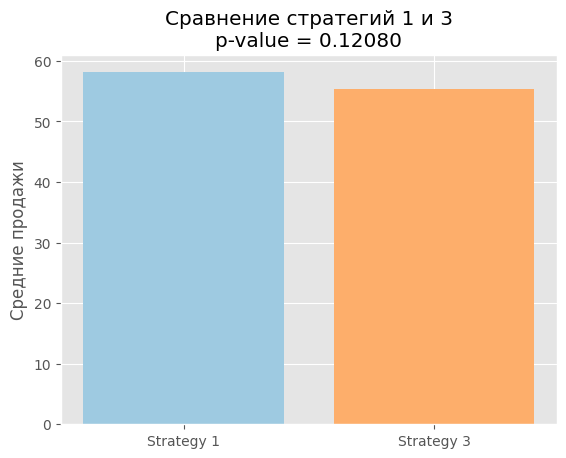

In [23]:
mean1 = df.loc[df['Promotion']==1, 'SalesInThousands'].mean()
mean3 = df.loc[df['Promotion']==3, 'SalesInThousands'].mean()

plt.bar(['Strategy 1', 'Strategy 3'], [mean1, mean3], color=['#9ecae1','#fdae6b'])
plt.title(f'Сравнение стратегий 1 и 3\np-value = {p_value:.5f}')
plt.ylabel('Средние продажи')
plt.show()